In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

# Zad.

Wczytaj dane

In [4]:
from tensorflow.examples.tutorials.mnist import input_data

# Import data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

X = mnist.train.images # Returns np.array
y = np.asarray(mnist.train.labels, dtype=np.int32)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
X.shape

(55000, 784)

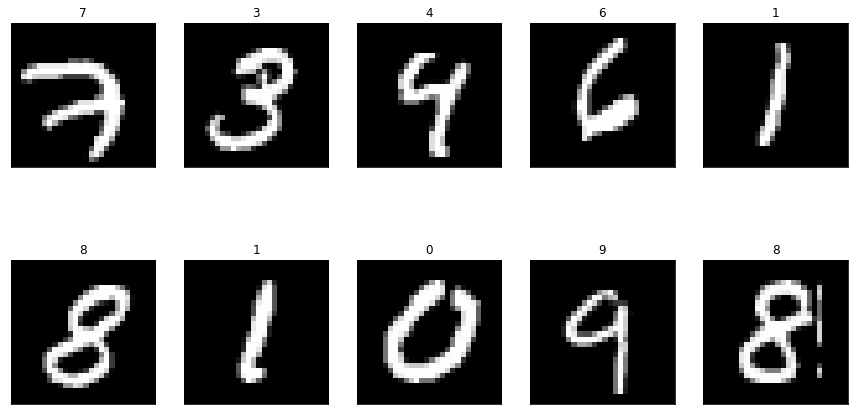

In [6]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(y, X, axes.ravel()):
    ax.imshow(image.reshape(28, 28), cmap=plt.cm.gist_gray)
    ax.set_title(target)
plt.show() 

# Zad
Zastosujmy algorytmy:
 * MiniBatchKMeans (batch_size = 100)
 * PCA + k-means
 * DBSCAN,
 * hierarchiczne klastrowanie
 
jeżeli się u was szybko liczy to
 * Birch + k-means 
 * k-means
 

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

km_pca = make_pipeline(PCA(n_components=10), KMeans(n_clusters=10, n_init=10))
y_km_pca = km_pca.fit_predict(X)

In [ ]:
from sklearn.cluster import Birch

km = KMeans(10, n_init=10)
b = Birch(1, n_clusters = km) # n_clusters = algorithm means algorithm will be used 
                                     # to cluster subclusters obtained from Birch
y_b = b.fit_predict(X)

In [16]:
from sklearn.cluster import MiniBatchKMeans

mb_km = MiniBatchKMeans(n_clusters=10, batch_size= 100)
y_mb = mb_km.fit_predict(X)

# Zad

Narysujmy środki grup dla każdej z metod.

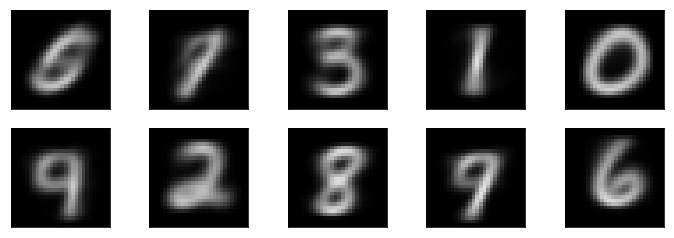

In [19]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()},figsize=(12, 4))

for center, ax in zip(mb_km.cluster_centers_, axes.ravel()):
    ax.imshow(center.reshape(28, 28),
              vmin=0, vmax=1, cmap=plt.cm.gist_gray)
plt.show() 

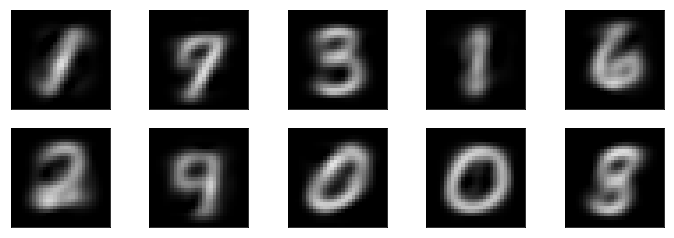

In [30]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()},figsize=(12, 4))

for center, ax in zip(km_pca.named_steps['kmeans'].cluster_centers_, axes.ravel()):
    ax.imshow(km_pca.named_steps['pca'].inverse_transform(center).reshape(28, 28),
              vmin=0, vmax=1, cmap=plt.cm.gist_gray)
plt.show() 

# Zad.

Zwizualizuj wyniki grupowania w 2D za pomocą

* t-SNE

dla każdej z metod

Może się troszkę liczyć więc weś tylko fragment danych np. 500.


In [25]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
X_tsne = tsne.fit_transform(X[0:500,:])
#colors = list(mcolors.CSS4_COLORS)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

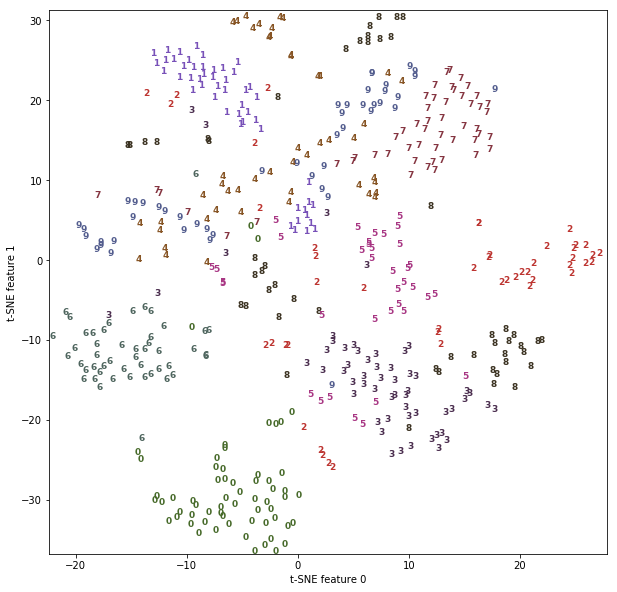

In [28]:
plt.figure(figsize=(10, 10))
plt.xlim(X_tsne[:, 0].min(), X_tsne[:, 0].max() + 1)
plt.ylim(X_tsne[:, 1].min(), X_tsne[:, 1].max() + 1)
for i in range(len(X_tsne)):
    # actually plot the digits as text instead of using scatter
    plt.text(X_tsne[i, 0], X_tsne[i, 1], str(y[i]),
             color = colors[y[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")
plt.show()

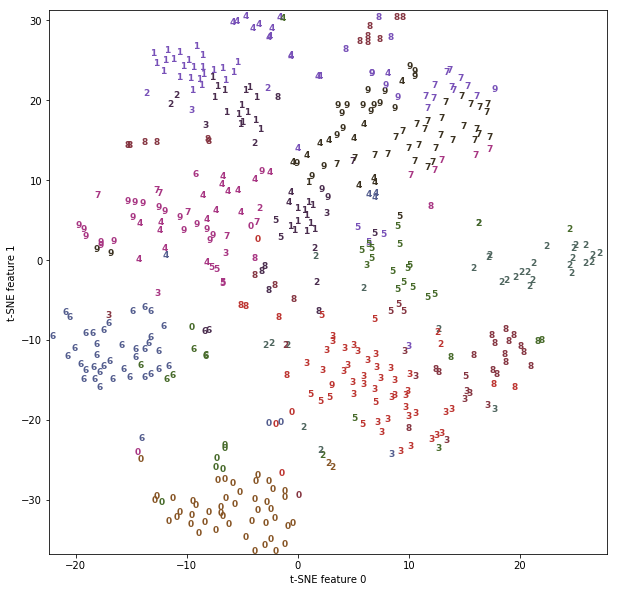

In [29]:
plt.figure(figsize=(10, 10))
plt.xlim(X_tsne[:, 0].min(), X_tsne[:, 0].max() + 1)
plt.ylim(X_tsne[:, 1].min(), X_tsne[:, 1].max() + 1)
for i in range(len(X_tsne)):
    # actually plot the digits as text instead of using scatter
    plt.text(X_tsne[i, 0], X_tsne[i, 1], str(y[i]),
             color = colors[y_mb[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")
plt.show()

# Zad

Narysujmy w tabeli:
  * środki grup,
  * najbliższe elementy w grupach,
  * najdalsze elementy w grupach.

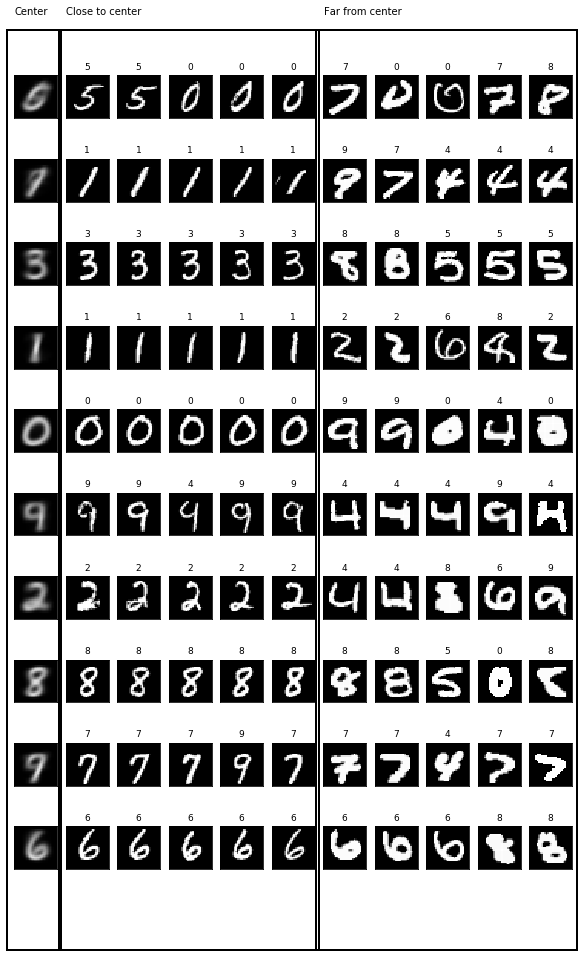

In [67]:
n_clusters = 10
fig, axes = plt.subplots(n_clusters, 11, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(10, 15), gridspec_kw={"hspace": .3})

for cluster in range(n_clusters):
    center = mb_km.cluster_centers_[cluster]
    mask = mb_km.labels_ == cluster
    dists = np.sum(( X - center) ** 2, axis=1)
    dists[~mask] = np.inf
    inds = np.argsort(dists)[:5]
    dists[~mask] = -np.inf
    inds = np.r_[inds, np.argsort(dists)[-5:]]
    axes[cluster, 0].imshow(center.reshape(28,28), vmin=0, vmax=1, cmap=plt.cm.gist_gray)
    for image, label, asdf, ax in zip(X[inds], y[inds],
                                      mb_km.labels_[inds], axes[cluster, 1:]):
        ax.imshow(image.reshape(28,28), vmin=0, vmax=1, cmap=plt.cm.gist_gray)
        ax.set_title("%s" % (label), fontdict={'fontsize': 9})

# add some boxes to illustrate which are similar and which dissimilar
rec = plt.Rectangle([-5, -30], 35, 600, fill=False, lw=2)
rec = axes[0, 0].add_patch(rec)
rec.set_clip_on(False)
axes[0, 0].text(0, -40, "Center")

rec = plt.Rectangle([-5, -30], 170, 600, fill=False, lw=2)
rec = axes[0, 1].add_patch(rec)
rec.set_clip_on(False)
axes[0, 1].text(0, -40, "Close to center")

rec = plt.Rectangle([-5, -30], 170, 600, fill=False, lw=2)
rec = axes[0, 6].add_patch(rec)
rec.set_clip_on(False)
axes[0, 6].text(0, -40, "Far from center")
plt.show()

# Zad

porówniaj dla wszystkich podejść:
```python
metrics.adjusted_rand_score
```


In [69]:
print(metrics.adjusted_rand_score(y, y_km_pca))
print(metrics.adjusted_mutual_info_score(y,  y_mb))

0.3386969047070657
0.4847984535307064
